In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [3]:
df = pd.read_csv("diabetes.csv.xls")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#NO NEED TO HANDLE MISSING VALUES AS THERE ARE NO NULL VALUES 

In [6]:
df.shape

(768, 9)

In [7]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
X=df.iloc[:,:-1]
Y = df.iloc[:,-1]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
Y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

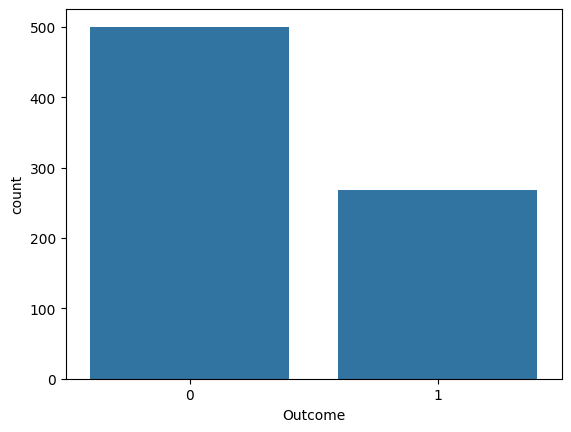

In [17]:
#imbalanced data
sns.countplot(x='Outcome',data=df)

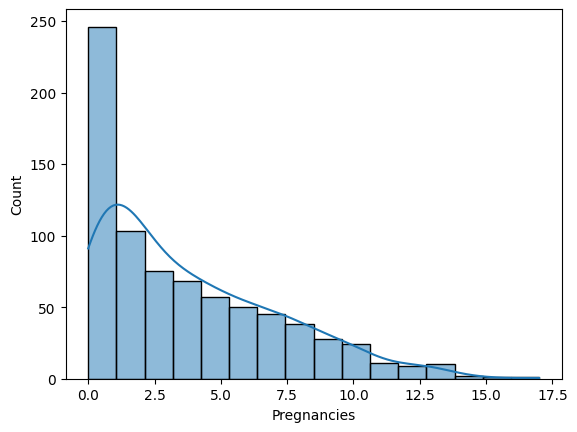

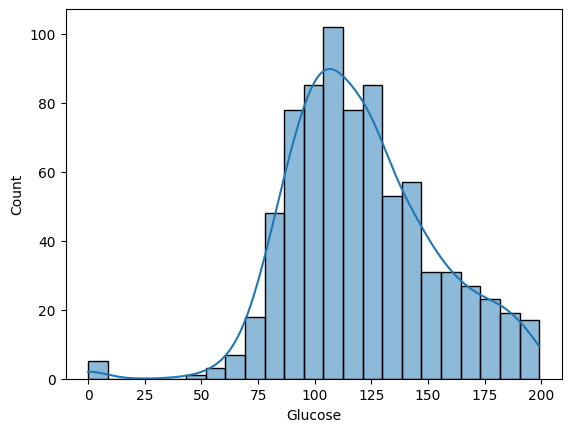

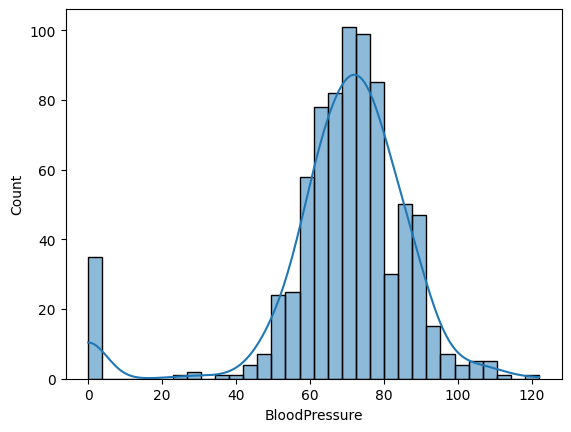

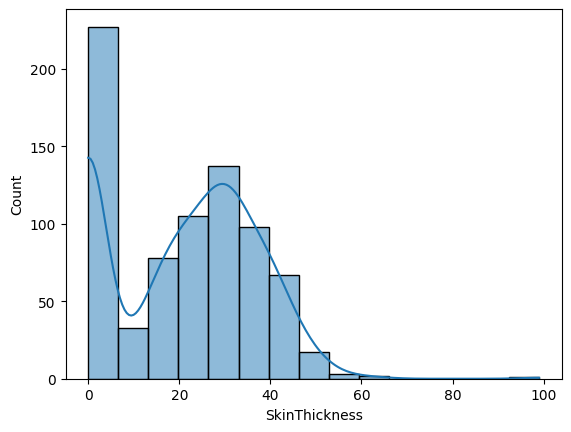

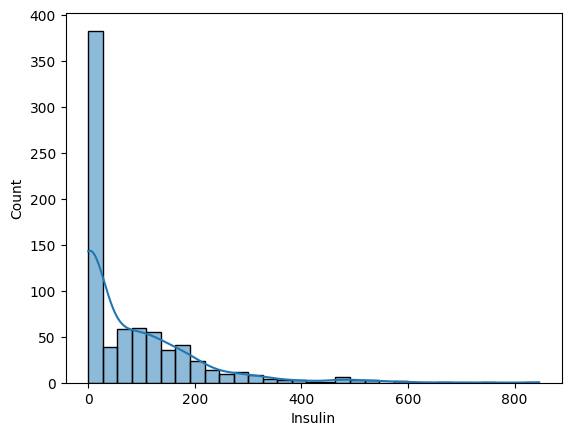

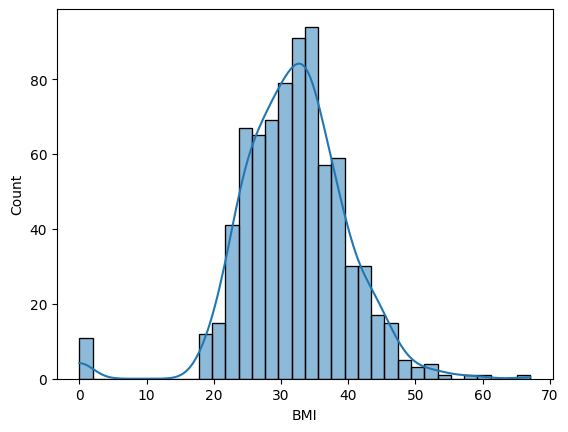

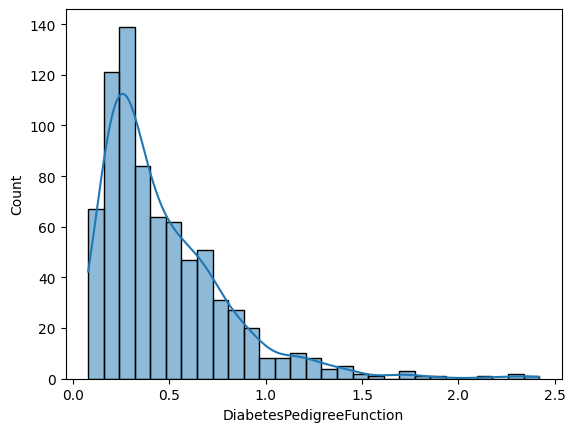

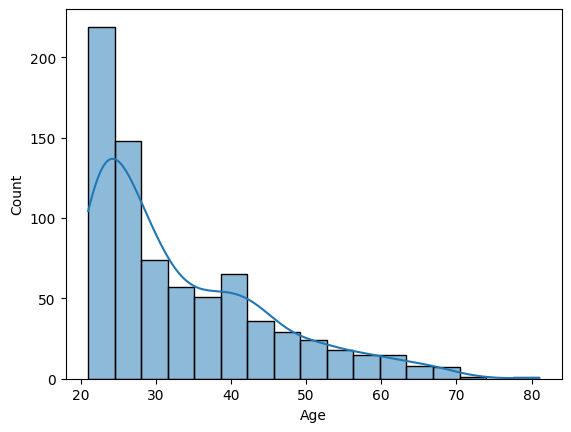

In [30]:
for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    # plt.figure(figsize=(10, 4))
    sns.histplot(x=column,data=df,kde=True)
    # plt.title(f'Distribution of {column}')
    plt.show()


<Axes: >

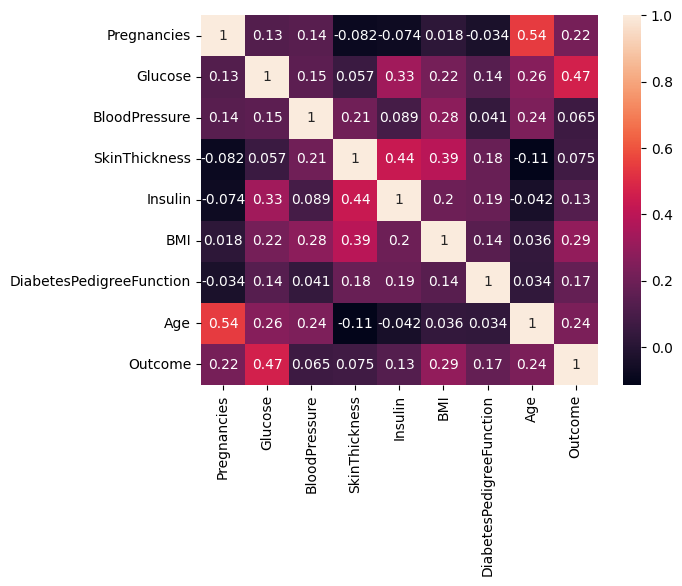

In [29]:
sns.heatmap(df.corr(), annot=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=7)

In [57]:


step1 = SMOTE(random_state=7)

step2 = StandardScaler()

n_components = min(len(set(y_train)) - 1, X_train.shape[1])
step3 = LDA(n_components=n_components)

step4 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=7,
    
)

pipeline = Pipeline([
    ('sampling', step1),
    ('scaling', step2),
    ('lda', step3),
    ('classifier', step4)
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__max_features': [None, 'sqrt', 'log2']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2}
Accuracy: 0.79
Precision: 0.69
Recall: 0.79
F1 Score: 0.74


In [58]:
best_model = grid_search.best_estimator_.named_steps['classifier']


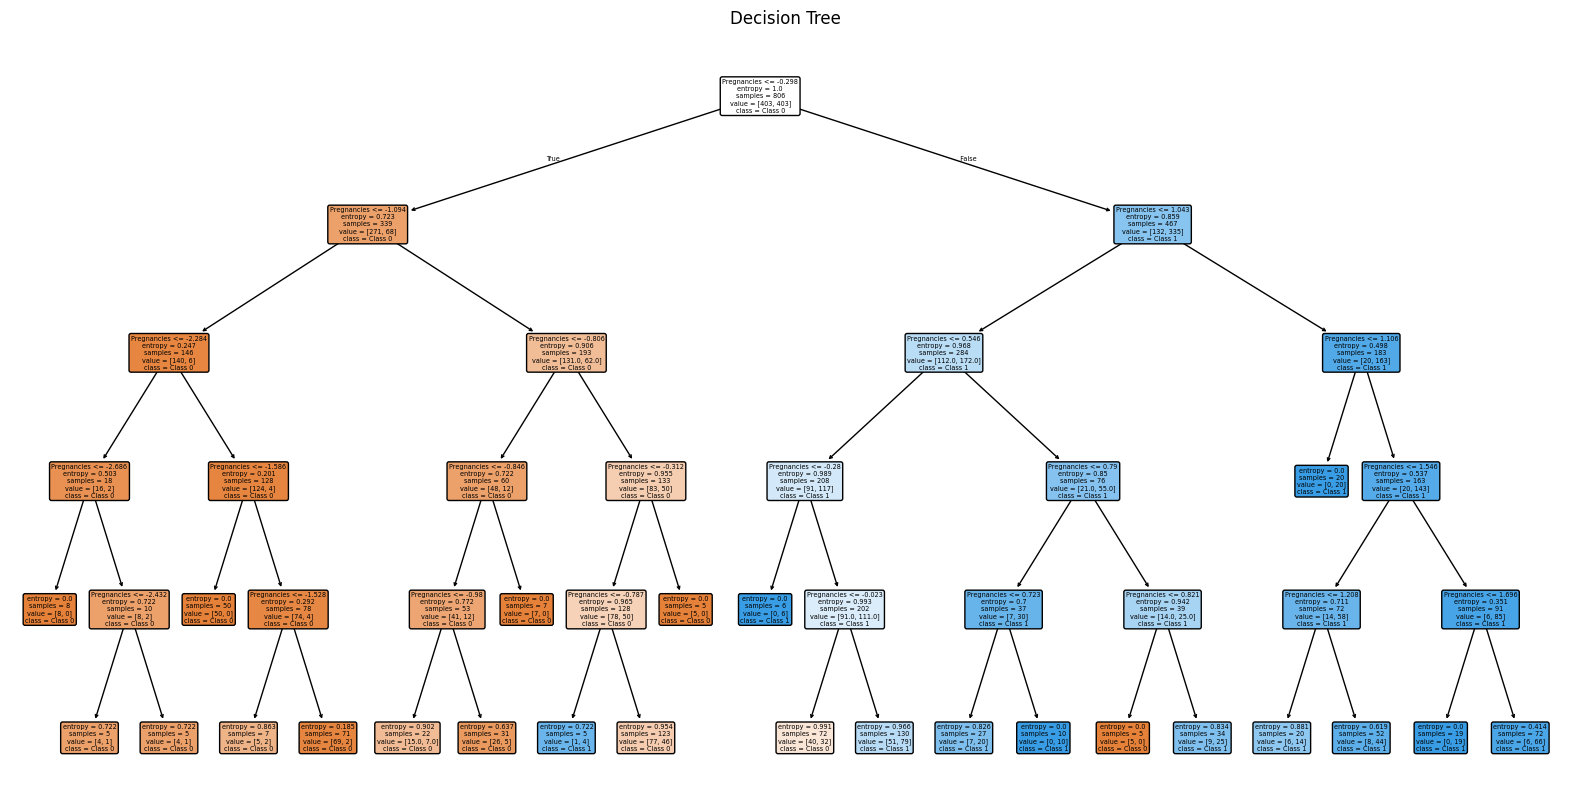

In [63]:
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title('Decision Tree')
plt.show()